<a href="https://colab.research.google.com/github/adenugroho/Mchn-Learning/blob/main/Praktikum_2_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
"""
Authors: Abdul Samad            samad19472002@gmail.com
         Janzaib Masood         janzaibaloch786@gmail.com
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.metrics import roc_curve, auc
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


def reSampler(X, y, samp):
    if(samp == 'None'):
        return splitter(X, y, 0.1)

    if(samp == 'SMOTE'):
        sm = SMOTE(sampling_strategy = 'auto')
        X_resampled , y_resampled = sm.fit_resample(X, Y)
        return splitter(X_resampled , y_resampled, 0.1)

    if(samp == 'SMOTEENN'):
        sm = SMOTEENN()
        X_resampled , y_resampled = sm.fit_resample(X, Y)
        return splitter(X_resampled , y_resampled, 0.1)

    if(samp == 'SMOTETomek'):
        sm = SMOTEENN()
        X_resampled , y_resampled = sm.fit_resample(X, Y)
        return splitter(X_resampled , y_resampled, 0.1)

def splitter(X, y, test_Size):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = test_Size, random_state=12)
    return xtrain, xtest, ytrain, ytest

def rocPlotter(actu, pred, clf, samp):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(actu, pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    Title = str('ROC: ' + str(clf) + ' using ' + str(samp))
    plt.title(Title)
    plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return roc_auc

def applyModel(clfr, X_, y_, xt, yt):
    a = globals()[clfr]()
    a.fit(X_, y_)
    scor = a.score(xt, yt)*100
    pred = a.predict(xt)
    actu = yt
    return pred, actu, scor


def tryAll(clfList, sampList, Inputs, Outputs):
    rep = np.zeros( (len(clfList), len(sampList)), dtype=float)

    for clf, clfIndex in zip(clfList, range(len(clfList))):
        for samp, sampIndex in zip(sampList, range(len(sampList))):
            X_train, X_test, Y_train, Y_test = reSampler(Inputs, Outputs, samp)
            prediction , actual, score =applyModel(clf, X_train, Y_train, X_test, Y_test)
            currentAUC = rocPlotter(prediction, actual, clf, samp)
            print(clf, ' with ', samp, ' scored =  ', score, ' on test set with AUC = ', currentAUC)
            rep[clfIndex, sampIndex] = currentAUC
    return rep


# Here you begin working on the data
df = pd.read_excel('/content/drive/MyDrive/Kuliah 23/Semester 3/Machine Learning/Data.xlsx')

# Deleting the two mentioned columns from the dataframe
df.drop('VchMotherTounge', axis=1, inplace =True)
df.drop('MotherTongueBin', axis=1, inplace =True)
df.head()

,GenderCode,IntBrothers,IntSisters,IntSchoolBrothers,IntSchoolSisters,ClassSchoolStatus,Disability01,Lang1,Lang2,Lang3,Lang4,Religion,RESULT
0,0,3,3,3,2,1,0,1,0,0,0,1,FAIL
1,0,4,5,1,1,1,0,1,0,0,0,1,PASS
2,0,5,3,0,0,1,0,1,0,0,0,1,PASS
3,0,2,4,1,4,1,0,1,0,0,0,1,PASS
4,0,2,1,0,0,1,0,1,0,0,0,1,FAIL


In [25]:
# Slicing from main dataframe to Input Data(X) and output Data(y)
y = df.iloc[:, 12]
X = df.iloc[:,:12]
# Replacng PASS and FAIL with integers 1 and 0 respectively
y[y == 'PASS'] = 1
y[y == 'FAIL'] = 0
display(X.head())
display(y.head())

<ipython-input-25-09f1cbab6240>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == 'PASS'] = 1
<ipython-input-25-09f1cbab6240>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == 'FAIL'] = 0


,GenderCode,IntBrothers,IntSisters,IntSchoolBrothers,IntSchoolSisters,ClassSchoolStatus,Disability01,Lang1,Lang2,Lang3,Lang4,Religion
0,0,3,3,3,2,1,0,1,0,0,0,1
1,0,4,5,1,1,1,0,1,0,0,0,1
2,0,5,3,0,0,1,0,1,0,0,0,1
3,0,2,4,1,4,1,0,1,0,0,0,1
4,0,2,1,0,0,1,0,1,0,0,0,1


0    0
1    1
2    1
3    1
4    0
Name: RESULT, dtype: object

In [26]:
# It's funny that I didn't have internet so I improvised an inefficient method
# to put values from Data frames in lists X and Y
a = y.values
b = X.values
del(y)
del(X)
X = []
Y = []
length = len(a)
for i in range(length):
    X.append(b[i,:])
    Y.append(a[i])

# How the the distribution of real Data set looks like?
Pass = np.count_nonzero(a)
print("Pass instances: ", Pass)
print("Fail instances: ", len(a) - Pass)

Pass instances:  4562
Fail instances:  1047


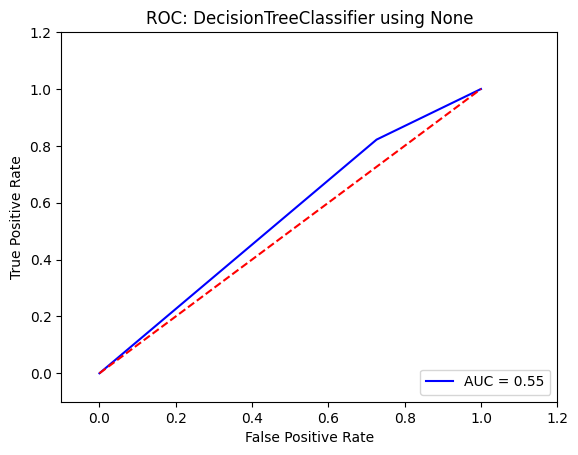

DecisionTreeClassifier  with  None  scored =   71.83600713012478  on test set with AUC =  0.5477814638191997


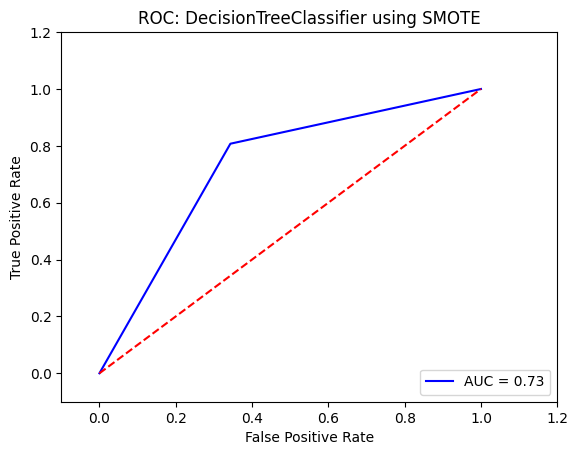

DecisionTreeClassifier  with  SMOTE  scored =   71.85104052573932  on test set with AUC =  0.7321292153224926


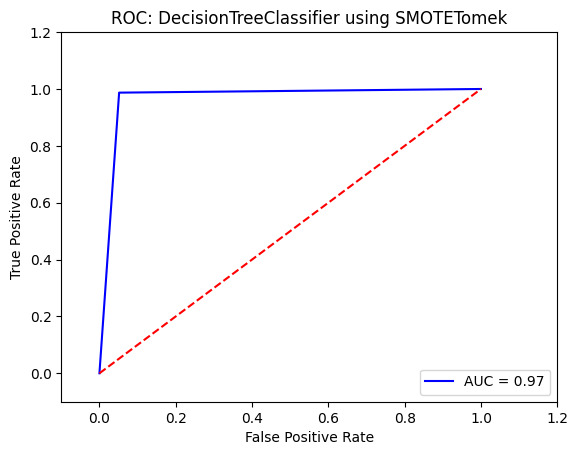

DecisionTreeClassifier  with  SMOTETomek  scored =   97.16494845360825  on test set with AUC =  0.9677557801467535


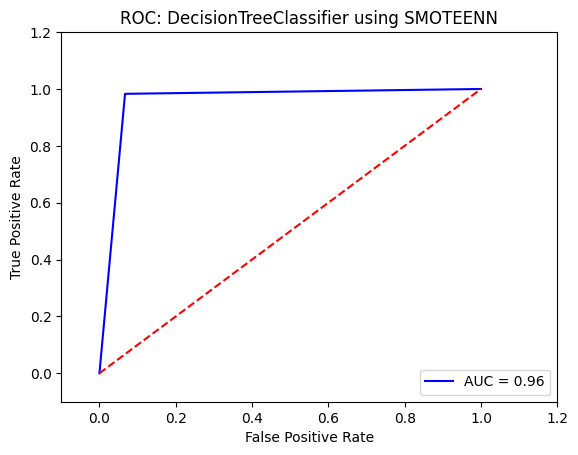

DecisionTreeClassifier  with  SMOTEENN  scored =   96.35416666666666  on test set with AUC =  0.9579323147222619


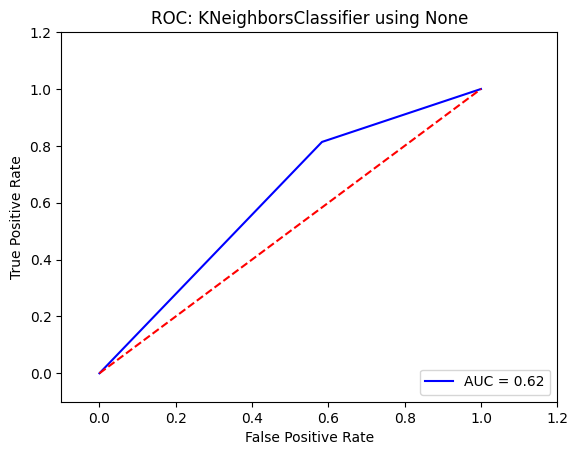

KNeighborsClassifier  with  None  scored =   79.67914438502673  on test set with AUC =  0.6152234636871509


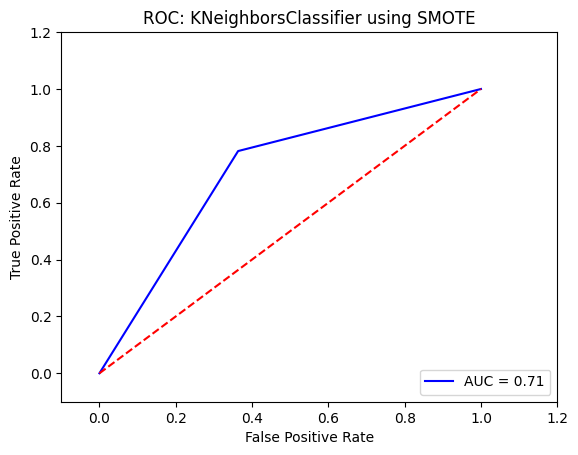

KNeighborsClassifier  with  SMOTE  scored =   69.55093099671413  on test set with AUC =  0.7091012621716514


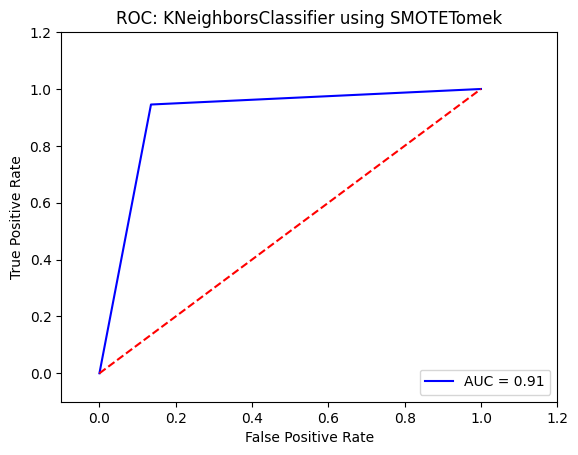

KNeighborsClassifier  with  SMOTETomek  scored =   91.45077720207254  on test set with AUC =  0.9051215080626845


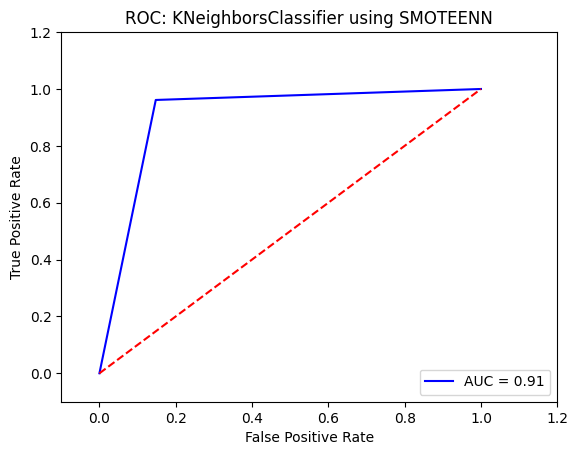

KNeighborsClassifier  with  SMOTEENN  scored =   91.8848167539267  on test set with AUC =  0.9068611919232652


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


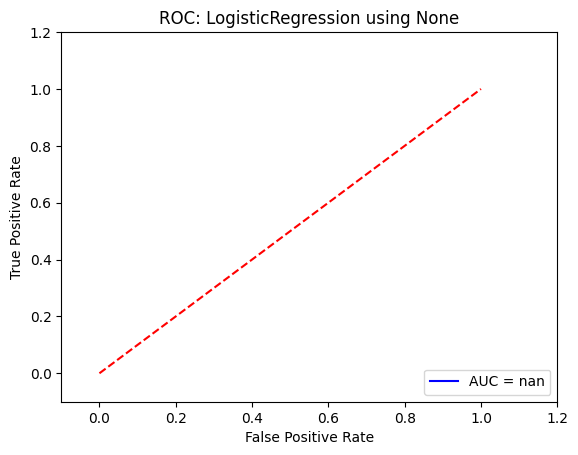

LogisticRegression  with  None  scored =   80.3921568627451  on test set with AUC =  nan


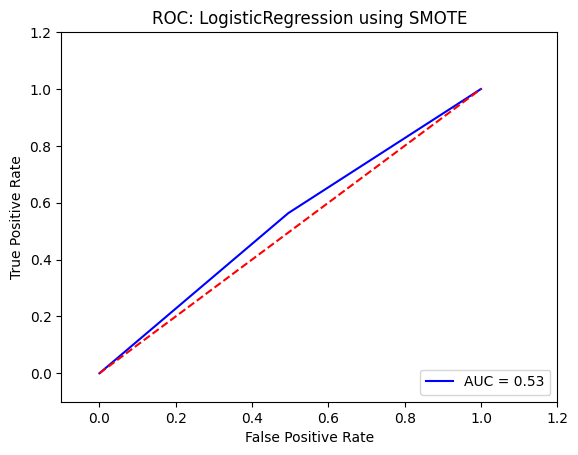

LogisticRegression  with  SMOTE  scored =   53.77875136911281  on test set with AUC =  0.5341764132553606


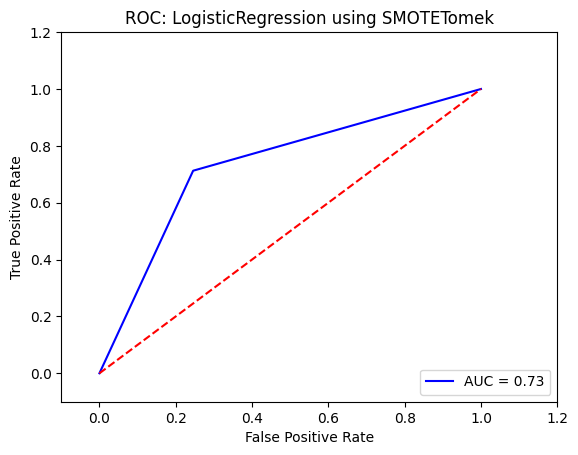

LogisticRegression  with  SMOTETomek  scored =   71.875  on test set with AUC =  0.7334620956059874


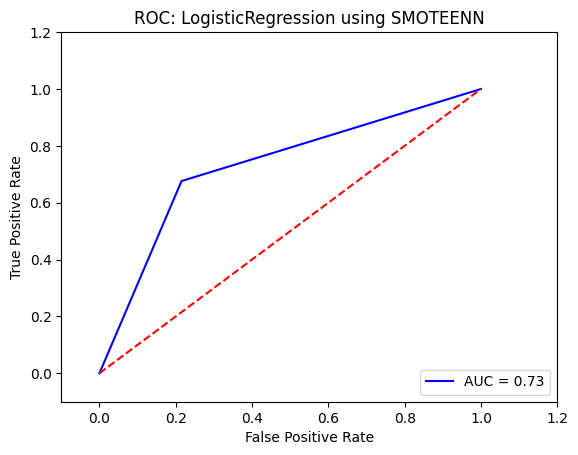

LogisticRegression  with  SMOTEENN  scored =   69.79695431472082  on test set with AUC =  0.7305003013863773


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


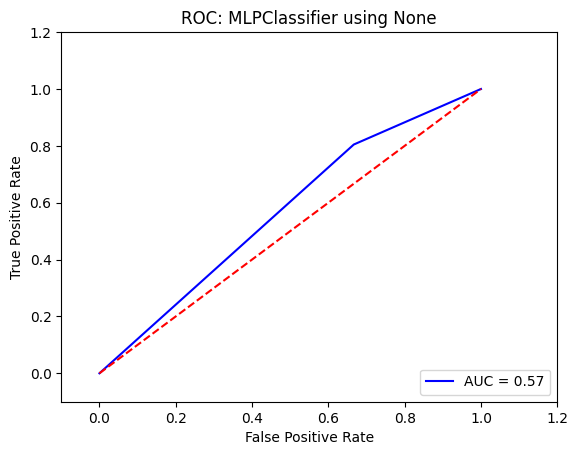

MLPClassifier  with  None  scored =   80.21390374331551  on test set with AUC =  0.5689964157706093


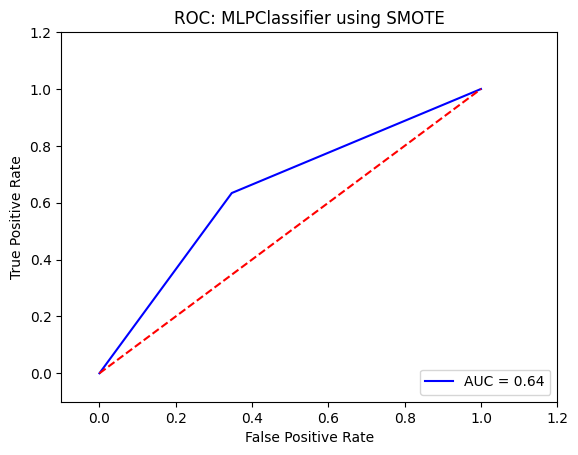

MLPClassifier  with  SMOTE  scored =   64.07447973713035  on test set with AUC =  0.6435945404721753


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


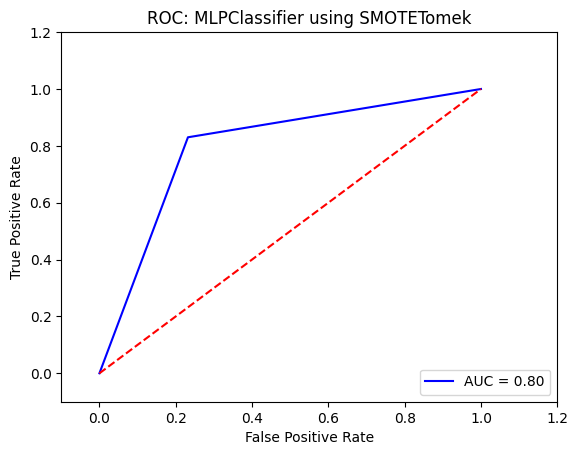

MLPClassifier  with  SMOTETomek  scored =   80.98958333333334  on test set with AUC =  0.7990579150579151


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


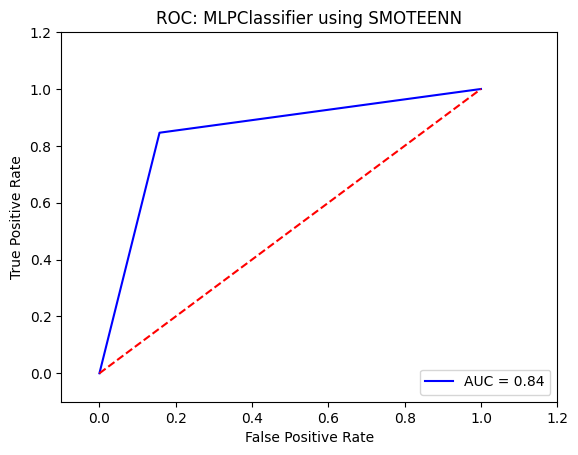

MLPClassifier  with  SMOTEENN  scored =   84.49612403100775  on test set with AUC =  0.8443367655966083


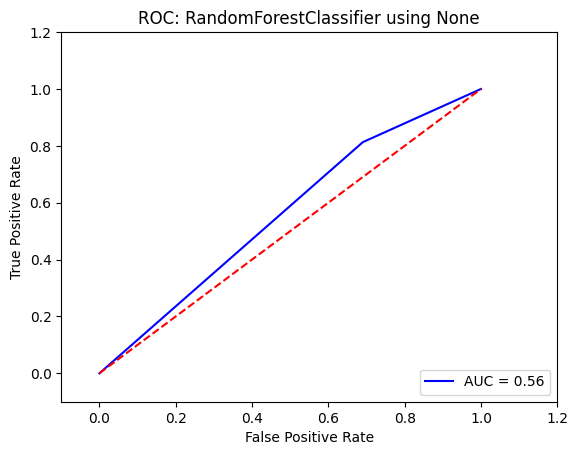

RandomForestClassifier  with  None  scored =   77.54010695187165  on test set with AUC =  0.5613129644921553


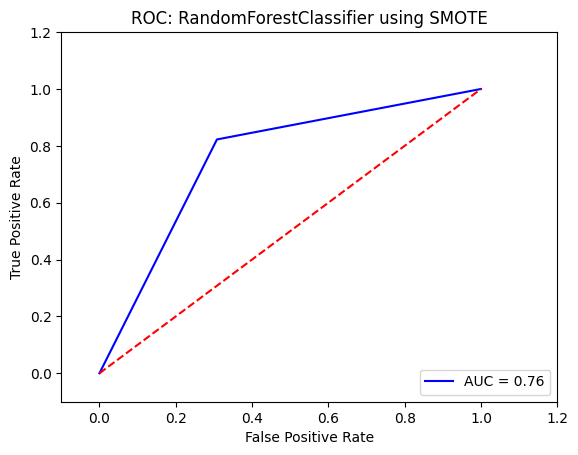

RandomForestClassifier  with  SMOTE  scored =   74.91785323110625  on test set with AUC =  0.7572538986354775


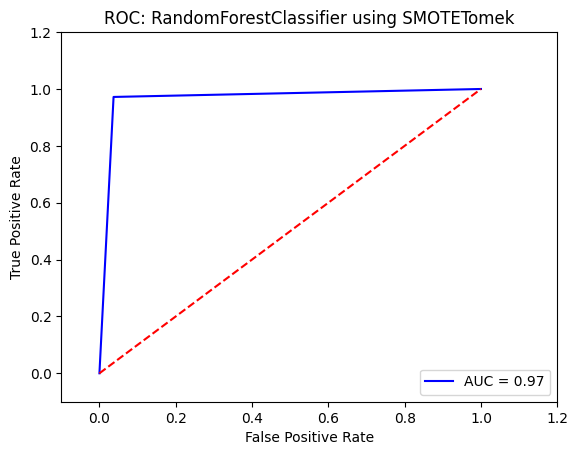

RandomForestClassifier  with  SMOTETomek  scored =   96.88311688311688  on test set with AUC =  0.9674814814814815


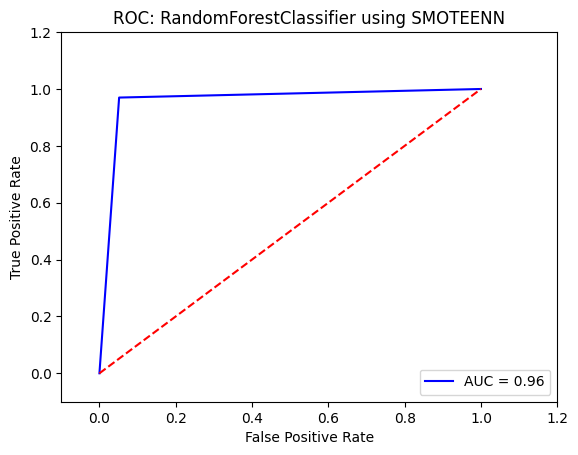

RandomForestClassifier  with  SMOTEENN  scored =   96.12403100775194  on test set with AUC =  0.9591073414905451


In [27]:
Classifiers = ['DecisionTreeClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'MLPClassifier', 'RandomForestClassifier']
Samplers = ['None', 'SMOTE', 'SMOTETomek', 'SMOTEENN']

report = tryAll(Classifiers, Samplers, X, Y)